<a href="https://colab.research.google.com/github/Adrianus-Bagas/Hand-Gesture-Detection/blob/main/Hand_Gesture_Detection_(Training).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Identifikasi Gestur Tangan

## 1. Import beberapa libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import cv2
import os
from tqdm import tqdm
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.models import Model,Sequential, Input, load_model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization, AveragePooling2D, GlobalAveragePooling2D
from tensorflow.keras.optimizers import *
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.applications import *

## 2. Memuat data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
disease_types=['bad','call','good','mute','peace']
data_dir = '/content/drive/MyDrive/dataset/Gestur/'
dir = os.path.join(data_dir)

In [ ]:
data = []
for defects_id, sp in enumerate(disease_types):
    for file in os.listdir(os.path.join(dir, sp)):
        data.append(['{}/{}'.format(sp, file), defects_id, sp])
        
df = pd.DataFrame(data, columns=['File', 'Label','Gestur'])
df

,File,Label,Gestur
0,bad/1764.jpg,0,bad
1,bad/1872.jpg,0,bad
2,bad/1942.jpg,0,bad
3,bad/1978.jpg,0,bad
4,bad/1542.jpg,0,bad
...,...,...,...
1995,peace/845.jpg,4,peace
1996,peace/1030.jpg,4,peace
1997,peace/683.jpg,4,peace
1998,peace/766.jpg,4,peace


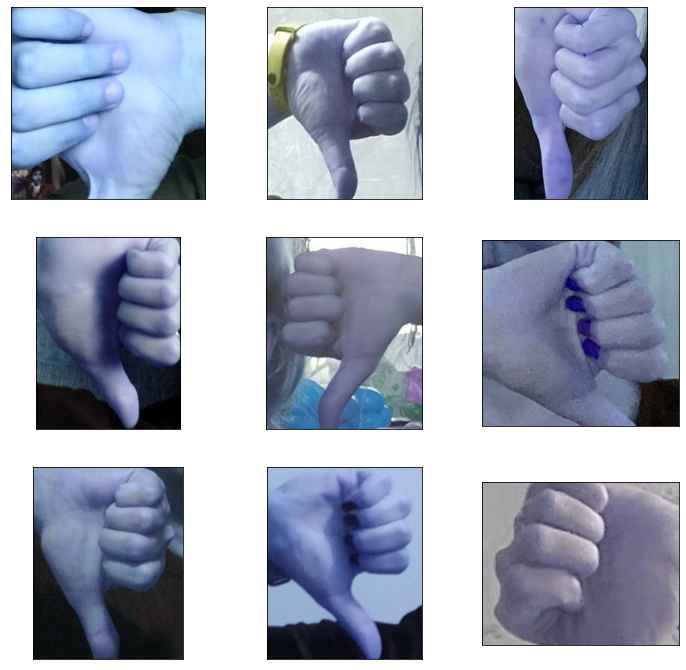

In [ ]:
def plot_defects(defect_types, rows, cols):
    fig, ax = plt.subplots(rows, cols, figsize=(12, 12))
    defect_files = df['File'][df['Gestur'] == defect_types].values
    n = 0
    for i in range(rows):
        for j in range(cols):
            image_path = os.path.join(data_dir, defect_files[n])
            ax[i, j].set_xticks([])
            ax[i, j].set_yticks([])
            ax[i, j].imshow(cv2.imread(image_path))
            n += 1
# Displays first n images of class from training set
plot_defects('bad', 3, 3)

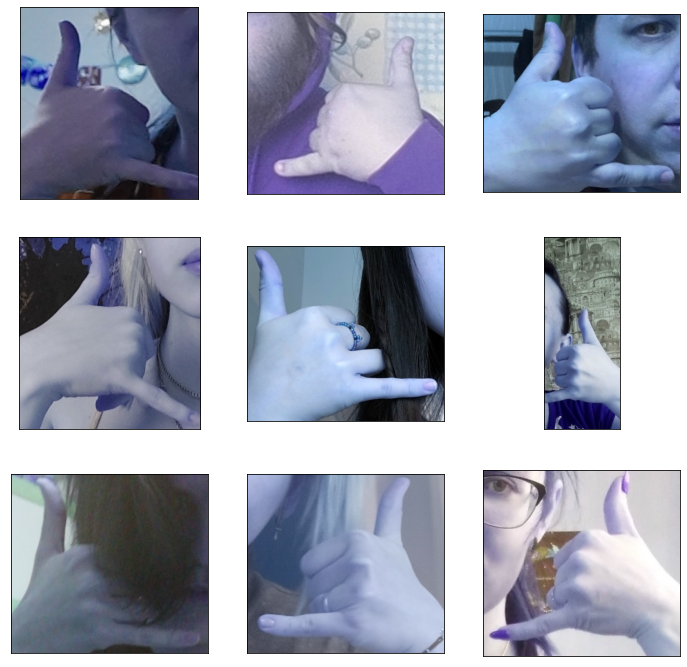

In [ ]:
def plot_defects(defect_types, rows, cols):
    fig, ax = plt.subplots(rows, cols, figsize=(12, 12))
    defect_files = df['File'][df['Gestur'] == defect_types].values
    n = 0
    for i in range(rows):
        for j in range(cols):
            image_path = os.path.join(data_dir, defect_files[n])
            ax[i, j].set_xticks([])
            ax[i, j].set_yticks([])
            ax[i, j].imshow(cv2.imread(image_path))
            n += 1
# Displays first n images of class from training set
plot_defects('call', 3, 3)

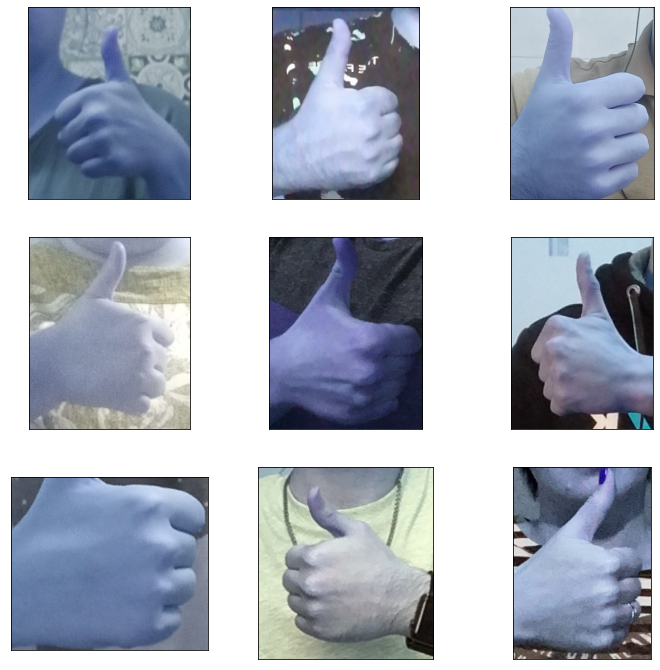

In [ ]:
def plot_defects(defect_types, rows, cols):
    fig, ax = plt.subplots(rows, cols, figsize=(12, 12))
    defect_files = df['File'][df['Gestur'] == defect_types].values
    n = 0
    for i in range(rows):
        for j in range(cols):
            image_path = os.path.join(data_dir, defect_files[n])
            ax[i, j].set_xticks([])
            ax[i, j].set_yticks([])
            ax[i, j].imshow(cv2.imread(image_path))
            n += 1
# Displays first n images of class from training set
plot_defects('good', 3, 3)

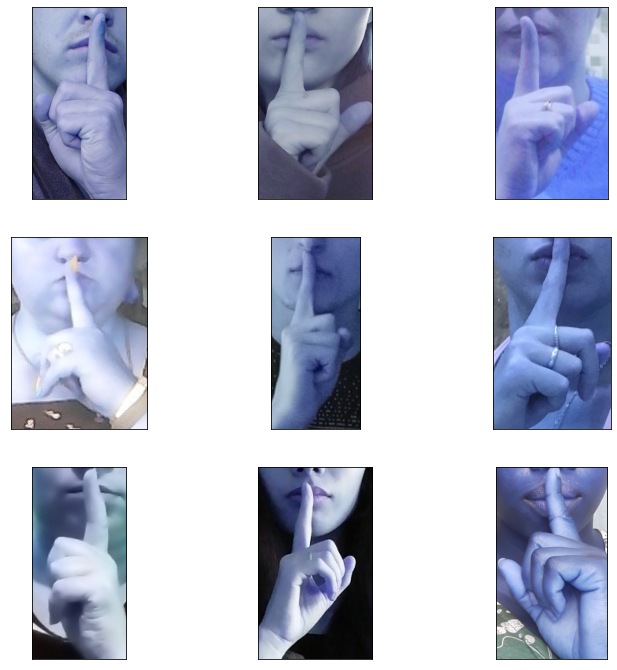

In [ ]:
def plot_defects(defect_types, rows, cols):
    fig, ax = plt.subplots(rows, cols, figsize=(12, 12))
    defect_files = df['File'][df['Gestur'] == defect_types].values
    n = 0
    for i in range(rows):
        for j in range(cols):
            image_path = os.path.join(data_dir, defect_files[n])
            ax[i, j].set_xticks([])
            ax[i, j].set_yticks([])
            ax[i, j].imshow(cv2.imread(image_path))
            n += 1
# Displays first n images of class from training set
plot_defects('mute', 3, 3)

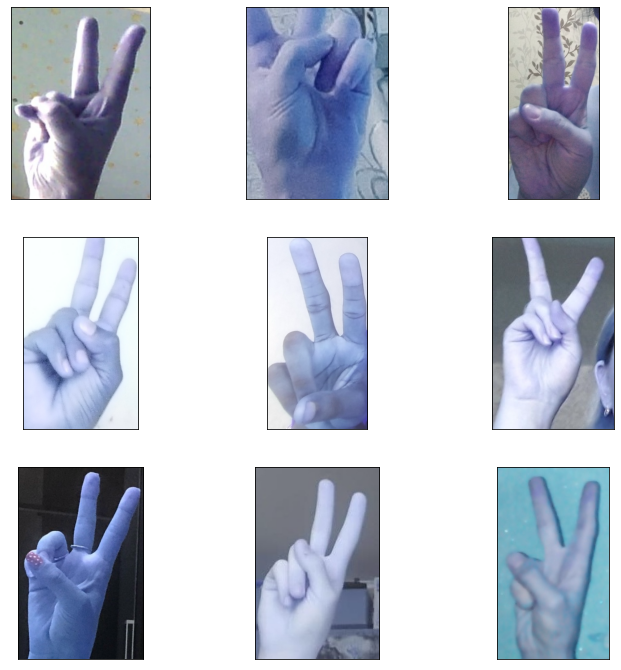

In [ ]:
def plot_defects(defect_types, rows, cols):
    fig, ax = plt.subplots(rows, cols, figsize=(12, 12))
    defect_files = df['File'][df['Gestur'] == defect_types].values
    n = 0
    for i in range(rows):
        for j in range(cols):
            image_path = os.path.join(data_dir, defect_files[n])
            ax[i, j].set_xticks([])
            ax[i, j].set_yticks([])
            ax[i, j].imshow(cv2.imread(image_path))
            n += 1
# Displays first n images of class from training set
plot_defects('peace', 3, 3)

## 3. Image Preprocessing

In [ ]:
IMAGE_SIZE = 100
def read_image(filepath):
    return cv2.imread(os.path.join(data_dir, filepath)) # Loading a color image is the default flag
# Resize image to target size
def resize_image(image, image_size):
    return cv2.resize(image.copy(), image_size, interpolation=cv2.INTER_AREA)

In [ ]:
X = []
for i, file in tqdm(enumerate(df['File'].values)):
    image = read_image(file)
    if image is not None:
        # gray=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
        resized = resize_image(image, (IMAGE_SIZE, IMAGE_SIZE))
        X.append(resized)

2000it [07:58,  4.18it/s]


In [ ]:
X=np.array(X)/255.0
X=np.reshape(X,(X.shape[0],IMAGE_SIZE,IMAGE_SIZE,3))
X.shape

(2000, 100, 100, 3)

In [ ]:
Y = df['Label'].values
Y = to_categorical(Y, num_classes=5)

In [ ]:
# Split the train and validation sets 
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, random_state=42)

# 4. Model MobileNet

In [ ]:
model_vgg = MobileNet(input_shape=(100,100,3),include_top=False,weights='imagenet')
model_vgg.trainable=False
model=Sequential()
model.add(model_vgg)
# model.add(Conv2D(512,(3,3),activation='relu',kernel_regularizer='l2',input_shape=(100,100,1)))
# model.add(MaxPooling2D(pool_size=(2,2)))
# # model.add(Dropout(0.2))

# model.add(Conv2D(256,(3,3),activation='relu',kernel_regularizer='l2'))
# model.add(MaxPooling2D(pool_size=(2,2)))
# # model.add(Dropout(0.2))

# model.add(Conv2D(128,(3,3),activation='relu',kernel_regularizer='l2'))
# model.add(MaxPooling2D(pool_size=(2,2)))
# # model.add(Dropout(0.2))

# model.add(Conv2D(64,(3,3),activation='relu',kernel_regularizer='l2'))
# model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(64,activation='relu',kernel_regularizer='l2'))
model.add(Dropout(0.5))
model.add(Dense(32,activation='relu',kernel_regularizer='l2'))
# model.add(Dropout(0.5))
# model.add(Dense(16,activation='relu',kernel_regularizer='l2'))
# model.add(Dropout(0.5))
# model.add(Dense(8,activation='relu',kernel_regularizer='l2'))
# model.add(Dropout(0.5))
model.add(Dense(5,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer=Adam(learning_rate=0.0005),metrics=['accuracy'])
model.summary()

Model: "sequential_34"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functio  (None, 3, 3, 1024)       3228864   
 nal)                                                            
                                                                 
 flatten_34 (Flatten)        (None, 9216)              0         
                                                                 
 dropout_57 (Dropout)        (None, 9216)              0         
                                                                 
 dense_88 (Dense)            (None, 64)                589888    
                                                                 
 dropout_58 (Dropout)        (None, 64)                0         
                                                                 
 dense_89 (Dense)            (None, 32)                2080      
                                                     

In [ ]:
# Fits the model on batches with real-time data augmentation
hist = model.fit(X_train, Y_train, batch_size=64, epochs=15, validation_data=(X_val, Y_val))

Epoch 1/15
25/25 [==============================] - 3s 48ms/step - loss: 3.2784 - accuracy: 0.4294 - val_loss: 2.2325 - val_accuracy: 0.7550
Epoch 2/15
25/25 [==============================] - 1s 23ms/step - loss: 2.3026 - accuracy: 0.6856 - val_loss: 1.8715 - val_accuracy: 0.8450
Epoch 3/15
25/25 [==============================] - 1s 23ms/step - loss: 2.0060 - accuracy: 0.7738 - val_loss: 1.6765 - val_accuracy: 0.9025
Epoch 4/15
25/25 [==============================] - 1s 23ms/step - loss: 1.7958 - accuracy: 0.8138 - val_loss: 1.5472 - val_accuracy: 0.9225
Epoch 5/15
25/25 [==============================] - 1s 22ms/step - loss: 1.6389 - accuracy: 0.8619 - val_loss: 1.4480 - val_accuracy: 0.9250
Epoch 6/15
25/25 [==============================] - 1s 23ms/step - loss: 1.5037 - accuracy: 0.8906 - val_loss: 1.3600 - val_accuracy: 0.9250
Epoch 7/15
25/25 [==============================] - 1s 23ms/step - loss: 1.4137 - accuracy: 0.9000 - val_loss: 1.2892 - val_accuracy: 0.9350
Epoch 8/15
25

In [ ]:
final_loss, final_accuracy = model.evaluate(X_val, Y_val)
print('Final Loss: {}, Final Accuracy: {}'.format(final_loss, final_accuracy))

13/13 [==============================] - 0s 15ms/step - loss: 1.0870 - accuracy: 0.9450
Final Loss: 1.0870393514633179, Final Accuracy: 0.9449999928474426


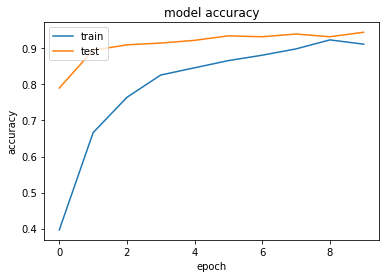

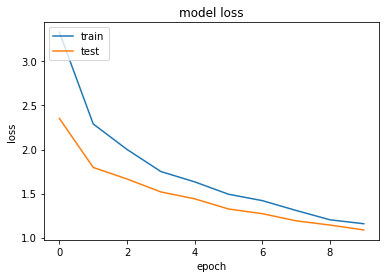

In [ ]:
# accuracy plot 
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# loss plot
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# from skimage import io
# from keras.preprocessing import image
# #path='imbalanced/Scratch/Scratch_400.jpg'
# img = image.load_img('/content/drive/MyDrive/dataset/data COVID/COVID/Covid (56).png', grayscale=False, target_size=(64, 64))
# show_img=image.load_img('/content/drive/MyDrive/dataset/data COVID/COVID/Covid (56).png', grayscale=False, target_size=(200, 200))
# disease_class=['Non Covid-19','Covid-19']
# x = image.img_to_array(img)
# x = np.expand_dims(x, axis = 0)
# x /= 255

# custom = model.predict(x)
# print(custom[0])

# plt.imshow(show_img)
# plt.show()

# a=custom[0]
# ind=np.argmax(a)
        
# print('Prediction:',disease_class[ind])

In [ ]:
# model.save('model densenet.h5')

In [ ]:
# X_val.shape

In [ ]:
# cm = confusion_matrix(Y_true, Y_pred)
# cm

In [ ]:
model.save('/content/drive/MyDrive/model/model gestur.h5')